# Homework 8: Advection and Diffusion

#### Objective:
In this homework, we will investigate the comparative magnitudes of advection and diffusion of heat in the ocean. For this exercise, we will rely on output from a model that we have compiled and run in class. If you have not already done so, you will need to compile and run the `global_with_exf` verification experiment according to the steps on the handout from Lecture 8-2.

#### Import Modules:
Begin by importing the modules to read in data, conduct calculations, and make plots.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

Define a path to your run directory where you will store data for this exercise.

In [2]:
run_folder = 'C:\\Users\\tandre\\Desktop\\Spring 2025\\cs185c\\MITgcm\\verification\\global_with_exf\\run'

## Part 1: The Heat Equation
In the space below, write down the equation that describes the evolution of temperature in the ocean. Then, for each term in the equation, write one sentence to describe what the term means qualitatively.

\begin{equation}
\frac{D\theta}{Dt}=\kappa\frac{\partial^2\theta}{\partial t^2}+\frac{J_h}{C_p\rho_w}
\end{equation}

$\frac{D\Theta}{Dt}$ represents the rate of change of water temperature adiabatically at a given location with respect to time in terms of the Lagrangian Derivative.


$\kappa\frac{\partial^2\theta}{\partial t^2}$ represents the change in temperature caused by diffusion of heat through water.

Note that $\kappa$ represents the thermal diffusivity of sea water.


$\frac{J_h}{C_p\rho_w}$ represents the change in temperature caused by other sources (solar radiation, sea ice formation, radiative cooling, ...)

Note that $J_h$ represents the energy from those sources and is divided by the density & heat capacity of sea water, $C_p\rho_w$.

## Part 2: Considering Temperature
In class, we wrote the temperature equation with the symbol $\Theta$. What does this term signify and why do we use it instead of temperature $T$?

**The $\Theta$ symbol describes potential temperature and takes into account the energy differences in different depths by representing the temperature of water if it were brought to the surface adiabatically. We use it instead of just regular temperature T because water with the same temperature at two different depths don't have the same amount of heat.**



## Part 3: Read in the data
This section will leverage the `ADVx_TH`, `ADVy_TH`, `DFxE_TH` and `DFyE_TH` variables generated from the `global_with_exf`model. These files refer to the $x$- and $y$-components of advection and diffusion (vector quantities). The $x$-component is aligned roughly eastward and the $y$-component is aligned roughly northward near the equator. Read in the 4 advection and diffusion fields. The units of these fields are  $^{\circ}$C$\cdot$m$^3$/s - a transport of temperature with volume. The quantity can by converted to a heat flux (in units of $W$) by considering specific heat ($C_p$) and the density $\rho_w$ of seawater. It is not necessary to make this conversion in this homework.

In addition to the 4 fields above, also read in the fields `XC` and `YC` grids generated by the model in your run directory:

In [3]:
n_rows = 40 # fill in the  
n_cols = 90 # model dimensions
n_depth_levels = 15# here

# if you ran you model according to the class directions,
# you should have these files to read in and no other
# changes are required in this cell

ADVx_TH_file = os.path.join(run_folder,'diags','ADVx_TH','ADVx_TH.0000000690.data')
ADVx_TH = np.fromfile(ADVx_TH_file, '>f4').reshape((n_depth_levels, n_rows, n_cols))

ADVy_TH_file = os.path.join(run_folder,'diags','ADVy_TH', 'ADVy_TH.0000000690.data')
ADVy_TH = np.fromfile(ADVy_TH_file, '>f4').reshape((n_depth_levels, n_rows, n_cols))

DFxE_TH_file = os.path.join(run_folder,'diags','DFxE_TH', 'DFxE_TH.0000000690.data')
DFxE_TH = np.fromfile(DFxE_TH_file, '>f4').reshape((n_depth_levels, n_rows, n_cols))

DFyE_TH_file = os.path.join(run_folder,'diags','DFyE_TH', 'DFyE_TH.0000000690.data')
DFyE_TH = np.fromfile(DFyE_TH_file, '>f4').reshape((n_depth_levels, n_rows, n_cols))

XC_file = os.path.join(run_folder,'XC.data')
XC = np.fromfile(XC_file, '>f4').reshape((n_rows, n_cols))

YC_file = os.path.join(run_folder,'YC.data')
YC = np.fromfile(YC_file, '>f4').reshape((n_rows, n_cols))

Subset the variables to the first depth level ($k=0$):

In [4]:
ADVx_TH = np.array(ADVx_TH[0,:,:])
ADVy_TH = np.array(ADVy_TH[0,:,:])
DFxE_TH = np.array(DFxE_TH[0,:,:])
DFyE_TH = np.array(DFyE_TH[0,:,:])

## Part 4: Plot of advection and diffusion
Next, plot the vector components of advection and diffusion in a 2x2 grid of plots. In creating your plot, be sure to do the following:
- Use the `vmin` and `vmax` values in the `pcolormesh` plotting command to control the minimum and maximum values of the plot. Each pair of plots ($x$- and $y$- components for advection, $x$- and $y$- components for diffusion) should use the same bounds. You color bounds should fit the data appropriately and the min and max values should match (-1*min = max). You may find the functions `np.min()` and `np.max()` helpful.
- Add a colorbar and use a divergent colormap, such as 'seismic' or something similar.
- Add labels to your axes and a title on each subplot

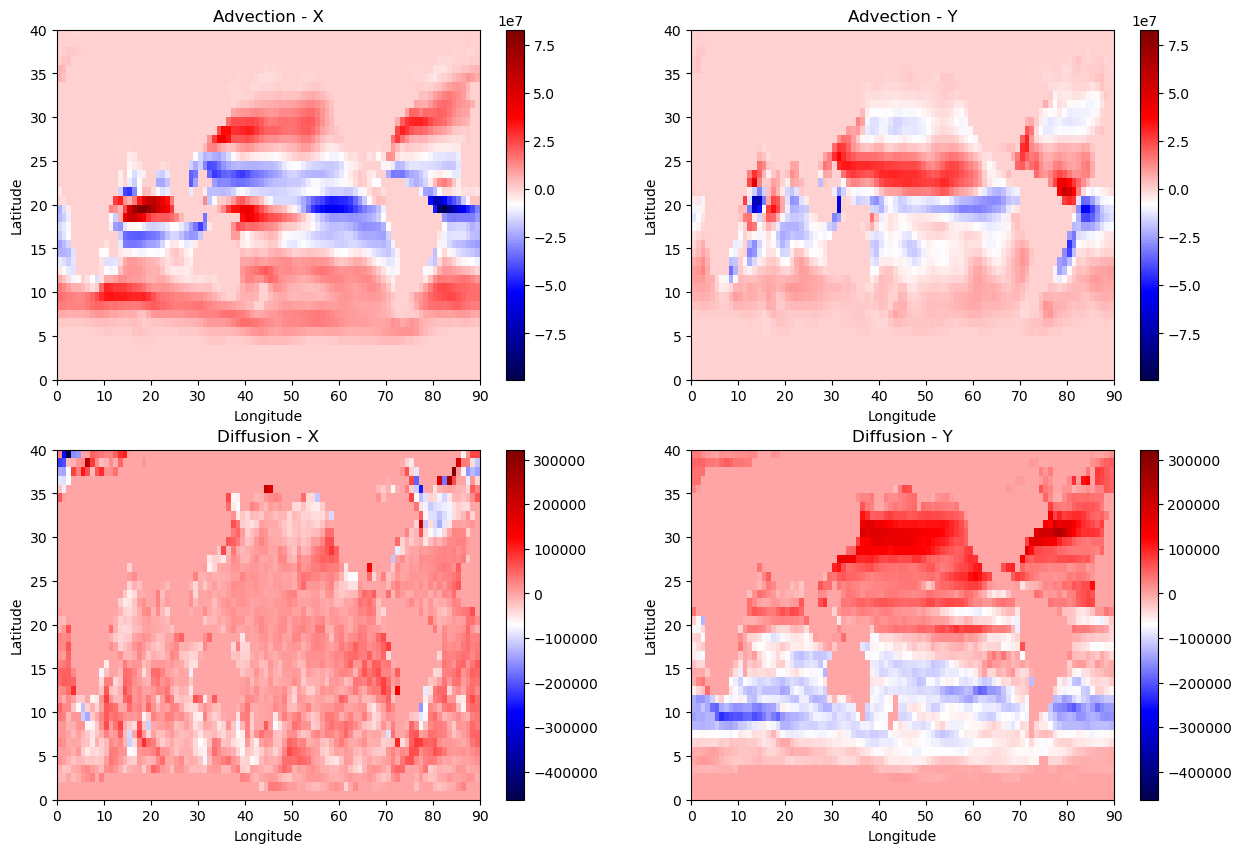

In [5]:
# make the 2x2 plot here
fig = plt.figure(figsize = (15,10))

vmin_adv = min(np.min(ADVx_TH), np.min(ADVy_TH))
vmax_adv = max(np.max(ADVx_TH), np.max(ADVy_TH))

vmin_df = min(np.min(DFxE_TH), np.min(DFyE_TH))
vmax_df = max(np.max(DFxE_TH), np.max(DFyE_TH))



# --- THETA ---
plt.subplot(2,2,1)
C = plt.pcolormesh(ADVx_TH, vmin = vmin_adv, vmax= vmax_adv, cmap='seismic')
plt.colorbar(C)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Advection - X')

# --- SALT ---
plt.subplot(2,2,2)
C = plt.pcolormesh(ADVy_TH, vmin = vmin_adv, vmax= vmax_adv, cmap = 'seismic')
plt.colorbar(C)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Advection - Y')

# --- Zonal (UVEL) ---
plt.subplot(2,2,3)
C = plt.pcolormesh(DFxE_TH, vmin = vmin_df, vmax = vmax_df, cmap='seismic')
plt.colorbar(C)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Diffusion - X')

# --- Meridonal (VVEL) ---
plt.subplot(2,2,4)
C = plt.pcolormesh(DFyE_TH, vmin = vmin_df, vmax = vmax_df, cmap='seismic')
plt.colorbar(C)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Diffusion - Y')

plt.show()


## Part 5: Plot Magnitudes
To compare the differences advection and diffusion, we first need to compute the magnitude. The magnitude of a vector quantity is given by

$$
|\textbf{v}| = \sqrt{v_x^2 + v_y^2}
$$

Apply this formula to the fields above to produce fields of 2D advection and diffusion at the surface of the ocean.

In [6]:
# conduct your calculation here
mag_adv = np.sqrt(ADVx_TH**2 + ADVy_TH**2)
mag_dif = np.sqrt(DFxE_TH**2 + DFyE_TH**2)

Now, plot the magnitudes of advection and diffusion. Since we are now working with magnitude rather than directional values, you should use a sequential colormap rather than a divergent colormap.

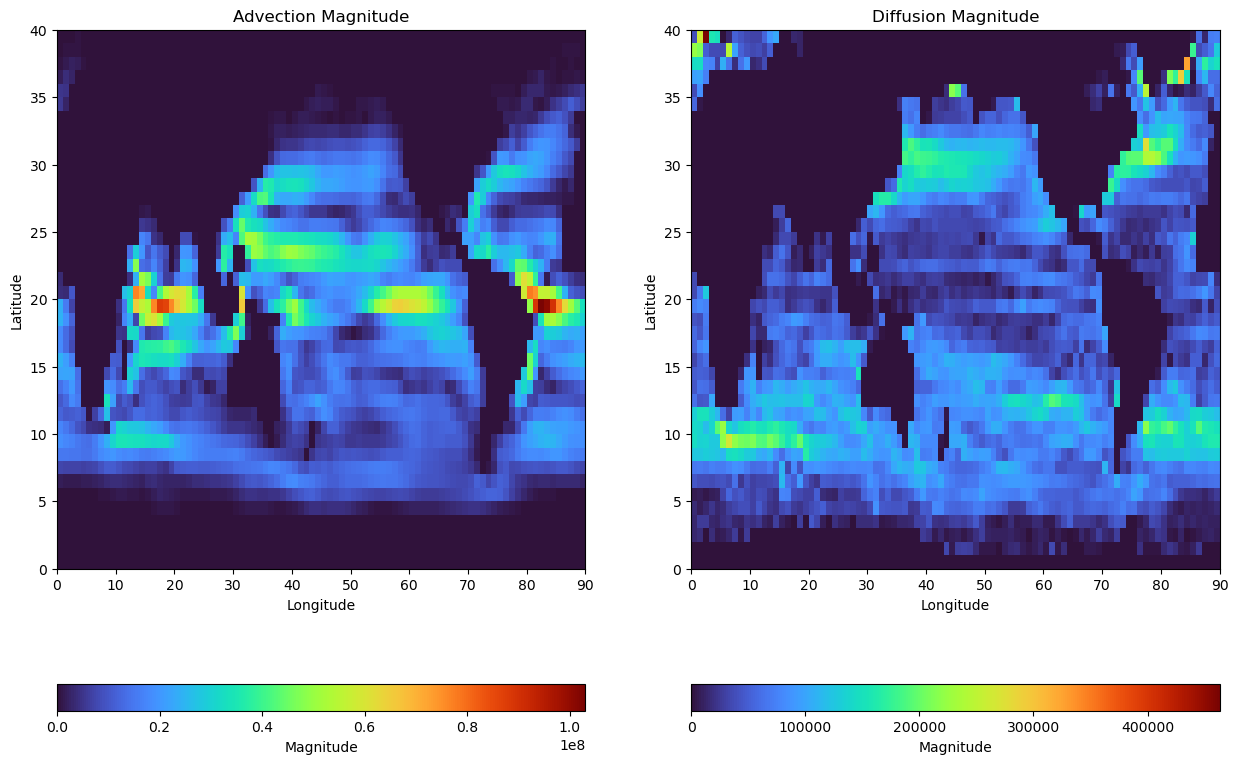

In [7]:
# enter code for your plot here
fig = plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
C = plt.pcolormesh(mag_adv, cmap='turbo')
plt.colorbar(C, orientation='horizontal',
            label='Magnitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Advection Magnitude')

plt.subplot(1,2,2)
C = plt.pcolormesh(mag_dif, cmap='turbo')
plt.colorbar(C, orientation='horizontal',
            label='Magnitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Diffusion Magnitude')
plt.show()

What is the mean ratio between advection and diffusion of temperature? Do a quick calculation below to compute the ratio. Be sure not to include points on land where the magnitude of each is 0.

In [8]:
# conduct your calculation here
# ratio = advection / diffusion
mag_adv_clean = mag_adv[mag_adv > 0]
mag_dif_clean = mag_dif[mag_dif > 0]
ratio = mag_adv_clean / mag_dif_clean
np.mean(ratio)

338.04984

## Part 6: Advection vs Diffusion
In the calculation above, we see that one process is responsible for transporting much more heat than the other. Which process is larger?

Suppose you would like to simplify the ocean model to be less computationally expensive. One way that you could achieve this is by removing processes from the model which have less of an effect on the model behavior than others. Based on the above plots and calculations, which process would you remove? Specifically, in the equation written in part 1, which term would you cancel from the equation?

**Since the ratio of Advection/Diffusion is very high (338), this means that advection has a stronger effect on heat transporation compared to diffusion. Based on the plots, magnitudes, and ratios, I would remove diffusion from the equation which is represented by the term:**

\begin{equation}
\kappa\frac{\partial^2\theta}{\partial t^2}
\end{equation}

**Removing the above term leaves us with simply which is the effects of advection (through lagrangian derivative) & sources of movement other than diffusion:**
\begin{equation}
\frac{D\theta}{Dt}=\frac{J_h}{C_p\rho_w}
\end{equation}